# Credit Risk en Python

## Lending Club data set 2007-2015

### Esteban Braganza


Para este ejercicio utilizaré una versión del data set de Lending Club para obtener y analizar el riesgo de crédito de una serie de créditos de múltiple propósito. Lending Club es una plataforma de préstamos en línea que brinda préstamos personales y comerciales a individuos y pequeñas empresas. La compañía tiene una gran cantidad de datos disponibles sobre el riesgo crediticio de sus prestatarios, incluyendo información sobre el monto del préstamo, la tasa de interés, el historial crediticio y la información del prestatario. Este conjunto de datos, conocido como "dataset de riesgo crediticio de LC", se utiliza para evaluar el riesgo de impago de los prestatarios y tomar decisiones de préstamo. Los campos pueden variar dependiendo de la versión del dataset, pero en general incluyen información como el historial crediticio, ingresos, empleo, historial de préstamos y el estado del prestatario. Algunas de las variables que tenemos disponibles aquí serán. Esta versión estaba disponible en el Kaggle hace tiempo. Todas las variables disponibles están definidas específicamente en el glosario adjunto **LCDataDictionary.xlsx**.

- **loan_amount:** el monto del préstamo solicitado por el prestatario.
- **interest_rate:** la tasa de interés asociada con el préstamo.
- **loan_term:** el plazo del préstamo, es decir, la duración del préstamo en meses.
- **credit_score:** el puntaje de crédito del prestatario, que refleja su historial crediticio.
- **income:** los ingresos del prestatario.
- **employment_status:** el estado laboral del prestatario, como empleado, independiente o desempleado.
- **loan_purpose:** el propósito del préstamo, como la compra de un automóvil o la consolidación de deudas.
- **delinquency_2yrs:** el número de veces que el prestatario ha incurrido en morosidad en los últimos 2 años.
- **home_ownership:** el estado de propiedad de la vivienda del prestatario, como dueño, inquilino o desconocido.
- **default:** si el prestatario ha incumplido en el pago del préstamo.

Entre otras más que están detalladas en el archivo de detalle de las variables. Y en el análisis que realizaré a continuación.



In [28]:
# Cargamos las librerias necesarias para el ejercicio de analisis de riesgo de crédito.

import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_recall_curve
from sklearn import metrics
import optbinning as optbin
import pandas_profiling as pf
import dataprep.eda as dpeda
import matplotlib as mtpl
#mtpl.use('TkAgg')

In [29]:
# Importamos el data set de Lending Club datos del 2007 al 2014
data = pd.read_csv('loan_data_2007_2014.csv',index_col=0)

C:\Users\esteb\AppData\Local\Temp\ipykernel_18692\1843473077.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv',index_col=0)


## EDA

Para este apartado se realizará una inspección general de las variables y análisis exploratorio. También se tomarán algunas acciones para remediar los problemas que surjan del data set. 

In [30]:
# Se realiza una inspección inicial de los datos.
data.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
294370,29233721,31766894,4975,4975,4975.0,36 months,15.61,173.95,D,D1,Senior School Lunch Helper,4 years,RENT,17369.0,Not Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,113xx,NY,9.68,1.0,Aug-07,0.0,19.0,NaN,10.0,0.0,4691,79.5,14.0,w,3178.55,3178.55,2609.250000,2609.25,1796.45,812.80,0.0,0.0,0.0,Jan-16,173.95,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,29191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5900.0,NaN,NaN,NaN
388512,16071788,18174260,14000,14000,13975.0,60 months,17.57,352.25,D,D4,Molding Superintendent,1 year,MORTGAGE,80000.0,Source Verified,May-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,465xx,IN,14.99,0.0,Apr-85,2.0,37.0,39.0,21.0,5.0,13339,77.6,52.0,f,10800.75,10781.47,6692.750000,6680.80,3199.25,3493.50,0.0,0.0,0.0,Jan-16,352.25,Feb-16,Jan-16,0.0,38.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,150.0,44171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,NaN,NaN,NaN
7301,884359,1099786,3000,3000,3000.0,60 months,12.42,67.38,B,B4,Estes Express Lines,1 year,OWN,76116.0,Not Verified,Sep-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,car,Honda CB 350,531xx,WI,9.98,0.0,Mar-01,1.0,79.0,NaN,11.0,0.0,1812,9.2,32.0,f,0.00,0.00,3735.694779,3735.69,3000.00,735.69,0.0,0.0,0.0,May-14,719.34,NaN,May-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321691,24606170,27039001,24000,24000,23875.0,36 months,6.49,735.47,A,A2,Attorney,7 years,RENT,108000.0,Source Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,900xx,CA,22.60,0.0,Oct-94,0.0,26.0,NaN,17.0,0.0,20578,76.5,39.0,f,13245.84,13176.85,12502.990000,12437.87,10754.16,1748.83,0.0,0.0,0.0,Jan-16,735.47,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,123433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26900.0,NaN,NaN,NaN
392767,16240931,18343429,12000,12000,12000.0,36 months,10.15,388.06,B,B2,ESTIMATOR,1 year,RENT,35360.0,Source Verified,May-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,117xx,NY,27.56,0.0,Jun-95,3.0,NaN,NaN,10.0,0.0,6337,19.9,22.0,w,5784.04,5784.04,7761.200000,7761.20,6215.96,1545.24,0.0,0.0,0.0,Jan-16,388.06,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,36350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31900.0,NaN,NaN,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## **Loan Status (construcción de variable dependiente)** 

Para definir la variable dependiente se utiliza la variable **loan_status** que tiene información del estado en el que se encuetra cada crédito. Con esto definiremos a la variable **default** la cual toma el valor 1 si el cliente ha incurrido en default y 0 si no lo ha hecho. Para definir a los 1, tomaremos en cuenta a los créditos que se encuentran en mora más de 30 días y los que se han dado por pérdida. Y definiremos créditos activos aquellos que han sido pagados, que están al día, en período de gracia y en mora entre 15 y 29 días.


In [32]:
# variable dependiente loan_status
print(data['loan_status'].value_counts()/data.shape[0]*100)
data['default'] = np.where(data['loan_status'].isin(['Current','Fully Paid', 'In Grace Period','Late (16-30 days)','Does not meet the credit policy. Status:Fully Paid']), 0,1)
print(data['default'].value_counts()/data.shape[0]*100)

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64
0    89.069346
1    10.930654
Name: default, dtype: float64


Se puede observar que en esta base de datos que cerca del 11% de los créditos han incurrido en default. Frente a 89% que se encuentran todavía clasificados como buenos.

In [33]:
# Algunas características del data set en cuestión.
print(f'El data set contiene {data.shape[0]} filas y {data.shape[1]} columnas.')

El data set contiene 466285 filas y 75 columnas.


## **Análisis de variables**

Algunos insights importantes del análisis realizado por data prep son los siguientes:

- **Posible Multicolinealidad o alta correlación** Tenemos varias variables con distribuciones similares y correlaciones muy altas. Esto se debe a que son variables que puden ser funciones lineales de otras variables como loan_amnt y funded_amnt por definición están estrechamente relacionadas. Por esta razón se procederá a eliminar variables que tengan alta correlación cercana a 1.

- **Nivel de nulos alto** Tenemos variables con un alto nivel de nulos, analizaremos cuales variables tiene sentido mantenerlas aunque su nivel de nulos sea alto. Pero en general variables con un nivel de nulos de más del 70% serán borradas de la base y no utilizadas. Sin embargo si hay alguna que aunque su nivel de nulos sea alta pero su información sea valiosa o tenga sentido mantenerla se lo hará. Un ejemplo de esto es mnths_since_last_maj_derog, que es el tiempo desde la última vez que el usuario incurrió en algún tipo de impago.

- **Fechas como strings** Tenemos variables de fecha que podrán ser utilizadas para contar obtener tiempos hasta los eventos que representan que pueden ser predictores interesantes en el análisis. Estas variables deben ser transformadas a formato fecha y realizar cálculos con ellas. 

- **Distribuciones sesgadas** Tenemos variables que tienen valores atípicos muy altos y que sesgan la distribución a la como por el ejemplo el ingreso anual. Esta variable tiene algunos clientes que presentan ingresos mucho más alto que la media por lo que tenemos una desviación estandar alta, y la mediana es menor que el promedio. Para estas variables no se realizará ningún otro tratamiento que el del binning óptimo al momento de modelizar. Y analizaremos su estadía en función de su information value.

- **Alta cardinalidad** hay variables categóricas con una alta cardinalidad, que podrían reducirse con métodos más adecuados, como por ejemplo la descripción de la razón del crédito, o el título del empleo sin embargo para este análisis no se podrá explorar. Lo dejaría para un futuro análisis. Se me ocurre clasificar esas frases usando un modelo de lenguaje natural o por ejemplo la API de gpt-3.

- **Una categoría** Otras variables que aunque son categóricas presentan solamente una categoría, estas variables serán desechadas. 


In [142]:
# Reporte completo
#dpeda.create_report(data)

## **Tratamiento de variables**

A continuación se realizara la limpieza, corrección y transformaciones iniciales de las variables que analizamos con anterioridad. Se empezará por eliminar las variables con nulos. Transformar los tipos de cada variable a uno más utilizable. Y finalmente se procederá a eliminar variables que tienen correlaciones altas. Para finalizar obtendremos el binning óptimo y el IV para seleccionar las variables de mayor relevancia.

In [35]:
# resumen nulos
def nulos_df(data):
    nulos = data.isna().sum().reset_index()
    nulos.columns = ['variable', 'n_nulos']
    nulos['% nulos'] = round(nulos['n_nulos']/ data.shape[0] * 100,2)
    nulos = nulos.sort_values('n_nulos', ascending=False).reset_index(drop=True)
    return nulos

In [36]:
# Análisis de nulos preeliminar

nulos = nulos_df(data=data)
nulos_mas_100 = nulos[nulos['% nulos'] >= 70].variable.to_list() # Variables con mas mas del 70% de nulos.
print(f'Lista de variables que contienen más del 70% de nulos.')
print(nulos_mas_100)
data.drop(columns=nulos_mas_100 + ['id', 'member_id','url'], inplace=True) # Eliminamos variables con más de 90% de nulos + vars que son irrelevantes.

Lista de variables que contienen más del 70% de nulos.
['open_acc_6m', 'open_il_6m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'verification_status_joint', 'dti_joint', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'annual_inc_joint', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_il_12m', 'mths_since_last_record', 'mths_since_last_major_derog', 'desc']


In [37]:
# Cambiamos los tipos de datos de algunas variables que pueden ser numericas, fechas o strings
data['term'] = data['term'].str.replace(' months', '').astype(int)

# 'emp_length' obtenemos solo el valor numerico aunque la mantenemos como categorica

data['emp_length'] = data['emp_length'].str.replace('+', '')
data['emp_length'] = data['emp_length'].str.replace('< 1', '0')
data['emp_length'] = data['emp_length'].str.replace(' years', '')
data['emp_length'] = data['emp_length'].str.replace(' year', '')
data['emp_length'] = data['emp_length'].fillna(0)
data['emp_length'] = data['emp_length'].astype(str)

# Variables de fecha 
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y' ,errors='coerce', yearfirst=2)
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y', errors='coerce', yearfirst=2)
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y', errors='coerce', yearfirst=2)
data['next_pymnt_d'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y', errors='coerce', yearfirst=2)
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y', errors='coerce', yearfirst=2)

# 'zip_code' 
data['zip_code'] = data['zip_code'].astype(str)

# Print the data types of the resulting DataFrame
print(data.dtypes)

loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int32
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
earliest_c

In [38]:
# Corregimos los valores nulos del resto de variables
variables_con_nulos = [  'acc_now_delinq',  'total_acc',  'pub_rec',  'open_acc',  
'inq_last_6mths',  'delinq_2yrs',  'emp_length']

for var in variables_con_nulos:
    data[var]=data[var].fillna(0)

data['annual_inc']= data['annual_inc'].fillna(data['annual_inc'].mean())
data['annual_inc']= data['annual_inc'].astype(float)

nulos = nulos_df(data)
nulos[nulos.n_nulos>0]

,variable,n_nulos,% nulos
0,mths_since_last_delinq,250351,53.69
1,next_pymnt_d,227214,48.73
2,total_rev_hi_lim,70276,15.07
3,tot_cur_bal,70276,15.07
4,tot_coll_amt,70276,15.07
5,emp_title,27588,5.92
6,last_pymnt_d,376,0.08
7,revol_util,340,0.07
8,collections_12_mths_ex_med,145,0.03
9,last_credit_pull_d,42,0.01


In [39]:
# Creamos variables con fechas 
from datetime import datetime, timedelta

reference_date = pd.to_datetime('2016-03-01') # Asumimos una fecha de referencia
data['months_since_earliest_cr_line'] = (reference_date.year-data['earliest_cr_line'].dt.year)*12 + (reference_date.month-data['earliest_cr_line'].dt.month)
data['months_since_issue_date'] = (data['last_pymnt_d'].dt.year-data['issue_d'].dt.year)*12 + (data['last_pymnt_d'].dt.month-data['issue_d'].dt.month)
data['months_since_last_credit_pull'] = (reference_date.year-data['last_credit_pull_d'].dt.year)*12 + (reference_date.year-data['last_credit_pull_d'].dt.month)

# Dropeamos algunas variables basados en las alertas de PF ()
variables_drop = ['policy_code','application_type','emp_title','zip_code',"funded_amnt","funded_amnt_inv",'total_pymnt_inv','sub_grade','title','out_prncp_inv','next_pymnt_d','issue_d','pymnt_plan','last_pymnt_d','last_credit_pull_d','earliest_cr_line','collections_12_mths_ex_med','loan_status']
data = data.drop(columns=variables_drop)

Finalmente nos quedamos con variables con niveles de nulos aceptables, sabemos que al realizar optimal binning podrá ser tomado en cuenta como una catagoría dentro de este proceso. Para el caso de **mnths_since_last_delinq** aunque tiene un valor de nulos importante es una variable que recoge información interesante pues usuarios que hayan tenido impagos recientes pueden ser propensos a volver a incurrir en el mismo.

In [40]:
nulos = nulos_df(data)
nulos[nulos.n_nulos>0]

,variable,n_nulos,% nulos
0,mths_since_last_delinq,250351,53.69
1,total_rev_hi_lim,70276,15.07
2,tot_cur_bal,70276,15.07
3,tot_coll_amt,70276,15.07
4,months_since_issue_date,376,0.08
5,revol_util,340,0.07
6,months_since_last_credit_pull,42,0.01
7,months_since_earliest_cr_line,29,0.01


## Information value 

Realizamos un análisis del information value para el set de variables que tenemos disponibles. Después se analizará el woe de las mismas para entender mejor su comportamiento con la variable dependiente. 

El rango de elección son variables que tienen un poder predictivo entre débil y alto. Por lo tanto son variables que tendrán un IV entre 0.05 y 1. Las variables que cumplen esta condición serían las siguientes. 

- Capital restante pendiente para el monto total financiado
- Pagos recibidos hasta el momento.
- Meses desde la generación del préstamo.
- Tasa de interés 
- Calificación del prestamista.
- Tiempo en meses desde que LC revisó el historial crediticio de este préstamo.
- Balance total de todas las cuentas del prestatario.
- Límite total de crédito en cuentas revolving/límite de crédito máximo
- Ingreso anual


Por otro lado tenemos algunas variables que tienen un poder predictivo sospechoso que no serán tomadas en cuenta ya que podemos estar frente un problema de leakeage. 

- Último monto total de pago recibido
- Capital recibido hasta la fecha

Estas variables pueden tener valores de IV tan altos pues deben tener una relación directa con la variable dependiente o directamente son proxys de la misma. Por supuesto si un cliente ha caído en impago pues no tendrá un último monto de pago. 

Por otro lado de 37 variables que obtuvimos después del procesado inicial solamente estamos tomando en cuenta 9 para el siguiente paso. Por lo que se explorará también el incluir variables con IV un poco menores a 0.05 ya que también aportan poder predictivo. 



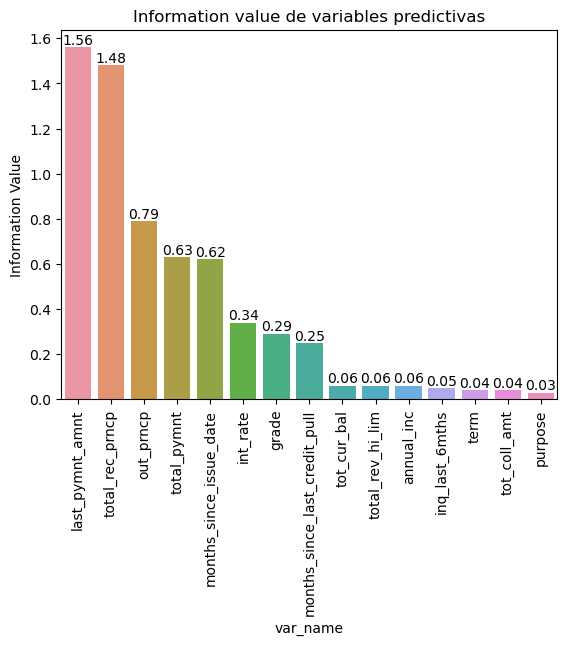

In [97]:
# Variables IV and WOE

categorical_vars = [col for col in data.columns if data[col].dtype == 'object' and col not in ['default']]
numerical_vars = [col for col in data.columns if data[col].dtype in ['float', 'int'] and col not in ['default']]

ivs = {'var_name': [], 'Information Value': [], 'status':[]}

for var in categorical_vars + numerical_vars:
    if var in categorical_vars:
        var_type = 'categorical'
    else:
        var_type = 'numerical'
    
    optb = optbin.OptimalBinning(name=var, dtype = var_type, solver="cp")
    optb.fit(data[var].values, data.default)
    binning_table = optb.binning_table
    binning_table.build()
    ivs['var_name'].append(var)
    ivs['Information Value'].append(binning_table.iv)
    ivs['status'].append(optb.status)
    
IV = pd.DataFrame(ivs).sort_values('Information Value', ascending = False).reset_index(drop=True)


# Plot del Information value obtenido

IV['Information Value'] = round(IV['Information Value'],2)
ax = sns.barplot(data=IV.head(15),x= 'var_name', y='Information Value',)
plt.xticks(rotation=90)
plt.title('Information value de variables predictivas')
# Add the numbers to each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height,
            height, ha='center', va='bottom')

plt.show()


In [99]:
IV.status.unique()

array(['OPTIMAL'], dtype=object)

## Análisis WOE de variables con alto IV

Se pueden observar las siguientes relaciones:

- Un último pago menor significa se asocia con mayor riesgo de impago.
- Un capital recibido menor también se asocia con un riesgo de impago mayor.
- El un menor capital todavía por pagar sorpresivamente tiene mayor porcentaje de eventos.
- A menor pago total, mayor riesgo de impago.
- A menor tiempo desde que empezó el crédito mayor riesgo de impago, sobre todo en el primer año.
- Una mayor tasa de interés mayor riesgo sobre todo se puede ver con tasas mayores a 15%.
- Tienen mayor riesgo de impago los clientes calificados de C para abajo.
- Usuarios con un menor salario anual tienen mayor riesgo de impago



last_pymnt_amnt


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 122.12)",23422,0.050231,18666,4756,0.203057,-0.730547,0.035336,0.004321
1,"[122.12, 216.50)",39561,0.084843,33383,6178,0.156164,-0.410792,0.016774,0.002082
2,"[216.50, 608.61)",189650,0.406726,160710,28940,0.152597,-0.383467,0.069350,0.008616
3,"[608.61, 730.10)",29559,0.063393,25369,4190,0.141750,-0.297017,0.006274,0.000781
4,"[730.10, 1409.27)",46480,0.099682,40107,6373,0.137113,-0.258364,0.007356,0.000917
5,"[1409.27, 3375.84)",23315,0.050002,22900,415,0.017800,1.91277,0.089893,0.009786
6,"[3375.84, 5397.04)",23605,0.050624,23556,49,0.002076,4.077471,0.227346,0.017545
7,"[5397.04, inf)",90693,0.194501,90626,67,0.000739,5.11196,1.108757,0.072062
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


<Figure size 800x800 with 0 Axes>

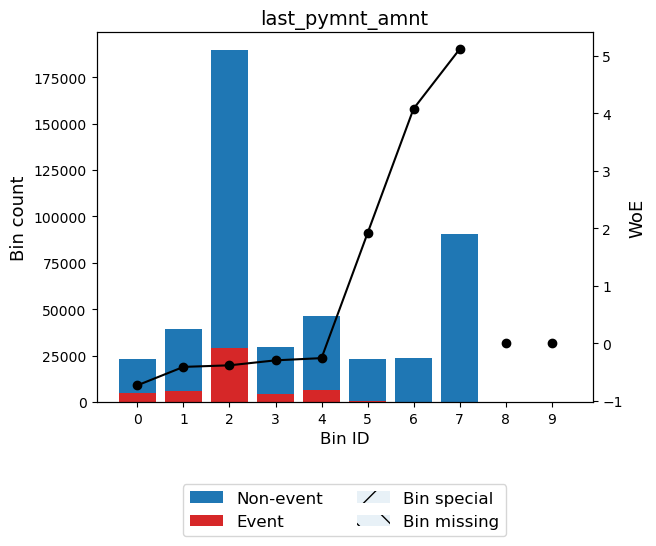

total_rec_prncp


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1790.15)",32539,0.069784,15636,16903,0.519469,-2.175759,0.639654,0.067174
1,"[1790.15, 2393.17)",23689,0.050804,17980,5709,0.240998,-0.950628,0.065326,0.007872
2,"[2393.17, 2960.42)",24606,0.052770,20073,4533,0.184223,-0.609852,0.024764,0.003048
3,"[2960.42, 3992.16)",46335,0.099371,39859,6476,0.139765,-0.280599,0.008723,0.001087
4,"[3992.16, 4998.35)",39772,0.085295,35204,4568,0.114855,-0.05576,0.000271,0.000034
5,"[4998.35, 5999.34)",37376,0.080157,34108,3268,0.087436,0.24751,0.004457,0.000556
6,"[5999.34, 7999.78)",59446,0.127489,55214,4232,0.071191,0.470698,0.023493,0.002910
7,"[7999.78, 9999.50)",44439,0.095304,42146,2293,0.051599,0.813435,0.045951,0.005591
8,"[9999.50, 14997.32)",75839,0.162645,73644,2195,0.028943,1.415217,0.189998,0.021947
9,"[14997.32, 19997.45)",38855,0.083329,38314,541,0.013924,2.162307,0.176526,0.018574


<Figure size 800x800 with 0 Axes>

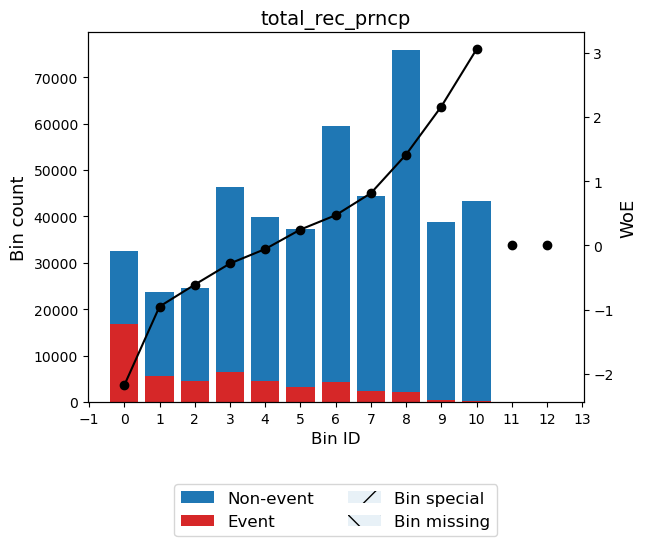

out_prncp


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.14)",230056,0.493381,186810,43246,0.187980,-0.634657,0.253033,0.031109
1,"[6.14, 2022.01)",29453,0.063165,28894,559,0.018979,1.847396,0.108263,0.011887
2,"[2022.01, 3444.29)",29734,0.063768,28987,747,0.025123,1.560693,0.086054,0.009783
3,"[3444.29, 5072.25)",28952,0.062091,28058,894,0.030879,1.348479,0.067448,0.007845
4,"[5072.25, 10254.88)",68162,0.146181,65875,2287,0.033552,1.262674,0.143620,0.016847
5,"[10254.88, 17045.38)",51201,0.109806,49273,1928,0.037656,1.143049,0.092372,0.010956
6,"[17045.38, inf)",28727,0.061608,27420,1307,0.045497,0.945694,0.038186,0.004603
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,466285,1.000000,415317,50968,0.109307,,0.788975,0.093030


<Figure size 800x800 with 0 Axes>

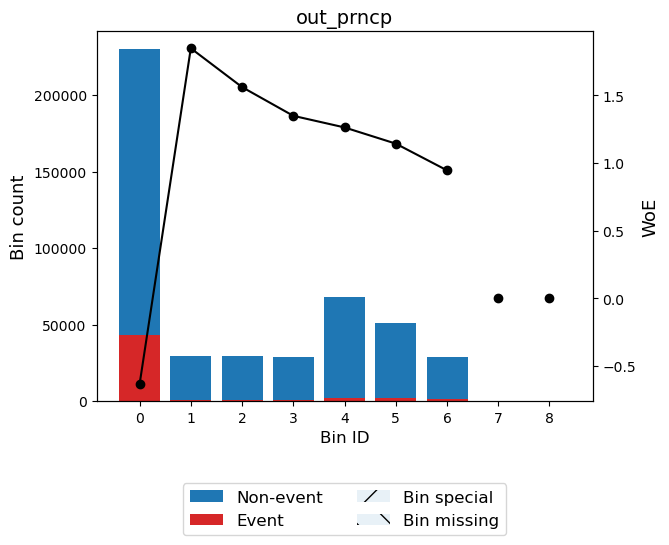

total_pymnt


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3244.67)",44626,0.095705,30402,14224,0.318738,-1.338266,0.275516,0.032080
1,"[3244.67, 4236.98)",28688,0.061525,23346,5342,0.186210,-0.623019,0.030278,0.003725
2,"[4236.98, 5225.80)",31993,0.068613,27009,4984,0.155784,-0.407907,0.013361,0.001659
3,"[5225.80, 6485.98)",42500,0.091146,37258,5242,0.123341,-0.136681,0.001796,0.000224
4,"[6485.98, 7778.51)",40963,0.087850,36538,4425,0.108024,0.013238,0.000015,0.000002
5,"[7778.51, 8826.85)",29074,0.062352,26186,2888,0.099333,0.106817,0.000682,0.000085
6,"[8826.85, 9793.56)",24093,0.051670,21836,2257,0.093679,0.171679,0.001424,0.000178
7,"[9793.56, 10778.87)",23325,0.050023,21463,1862,0.079829,0.346835,0.005253,0.000653
8,"[10778.87, 12902.82)",46885,0.100550,43787,3098,0.066077,0.550736,0.024589,0.003035
9,"[12902.82, 14323.70)",24044,0.051565,22504,1540,0.064049,0.584067,0.014000,0.001726


<Figure size 800x800 with 0 Axes>

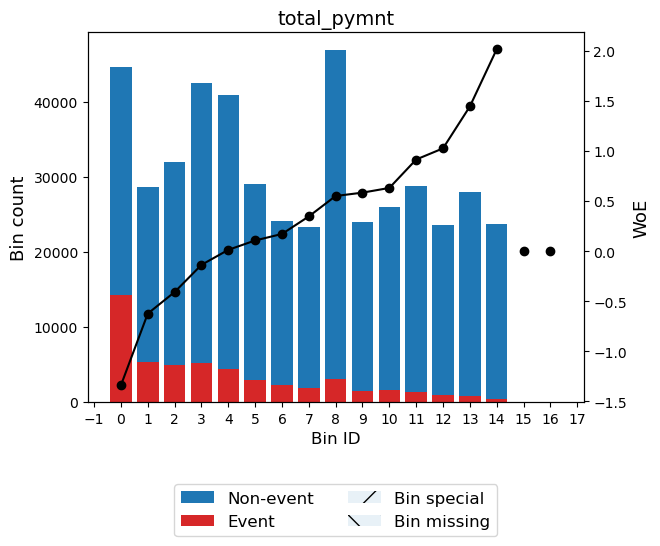

months_since_issue_date


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 12.50)",85541,0.183452,61724,23817,0.278428,-1.145571,0.365064,0.043291
1,"[12.50, 14.50)",51861,0.111222,46980,4881,0.094117,0.166528,0.002890,0.000361
2,"[14.50, 17.50)",72514,0.155514,66499,6015,0.082949,0.305086,0.012844,0.001599
3,"[17.50, 24.50)",122490,0.262693,113091,9399,0.076733,0.389745,0.034255,0.004255
4,"[24.50, 26.50)",24270,0.052050,22580,1690,0.069633,0.494492,0.010488,0.001298
5,"[26.50, 29.50)",29598,0.063476,27708,1890,0.063856,0.5873,0.017404,0.002145
6,"[29.50, 35.50)",39086,0.083824,37067,2019,0.051655,0.812281,0.040319,0.004906
7,"[35.50, inf)",40549,0.086962,39668,881,0.021727,1.709398,0.133721,0.014938
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,376,0.000806,0,376,0.000000,0.0,0.000000,0.000000


<Figure size 800x800 with 0 Axes>

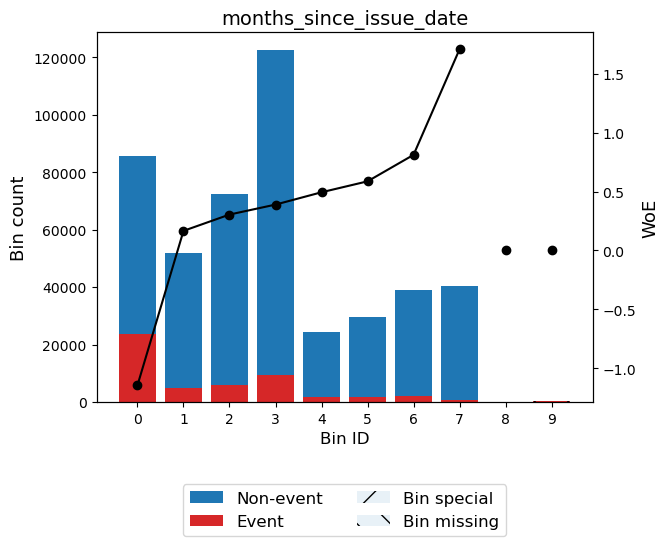

int_rate


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 7.50)",29501,0.063268,28771,730,0.024745,1.576235,0.086617,0.009829
1,"[7.50, 9.50)",54467,0.116811,52020,2447,0.044926,0.958921,0.074070,0.008920
2,"[9.50, 10.50)",25232,0.054113,23600,1632,0.064680,0.573596,0.014227,0.001754
3,"[10.50, 11.69)",40918,0.087753,37992,2926,0.071509,0.465895,0.015872,0.001966
4,"[11.69, 13.05)",57504,0.123324,52598,4906,0.085316,0.274375,0.008338,0.001039
5,"[13.05, 13.98)",42085,0.090256,37805,4280,0.101699,0.080644,0.000569,0.000071
6,"[13.98, 15.12)",48590,0.104207,43074,5516,0.113521,-0.042577,0.000192,0.000024
7,"[15.12, 15.61)",26104,0.055983,22883,3221,0.123391,-0.137142,0.001111,0.000139
8,"[15.61, 17.57)",55543,0.119118,47305,8238,0.148318,-0.349986,0.016705,0.002078
9,"[17.57, 19.01)",29145,0.062505,24025,5120,0.175673,-0.551904,0.023515,0.002903


<Figure size 800x800 with 0 Axes>

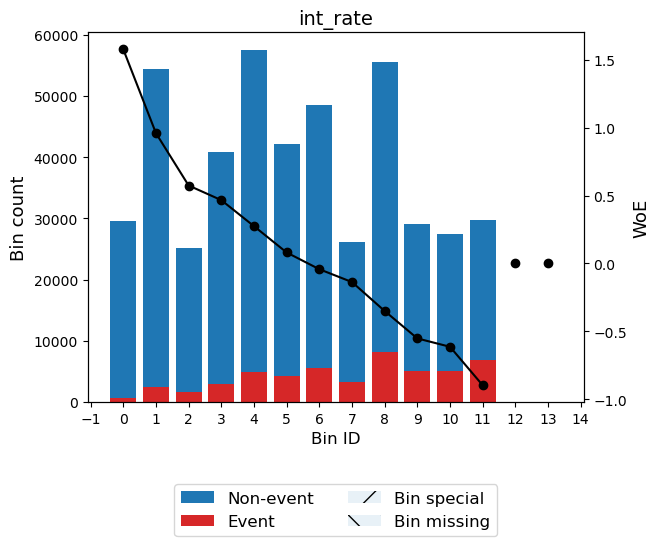

grade


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[A],74867,0.160561,71970,2897,0.038695,1.11473,0.129810,0.015435
1,[B],136929,0.293659,126170,10759,0.078574,0.364043,0.033746,0.004195
2,[C],125293,0.268705,110909,14384,0.114803,-0.055251,0.000838,0.000105
3,[D],76888,0.164895,65040,11848,0.154094,-0.395001,0.029963,0.003721
4,"[E, F, G]",52308,0.112180,41228,11080,0.211822,-0.783868,0.092593,0.011287
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,466285,1.000000,415317,50968,0.109307,,0.286950,0.034743


<Figure size 800x800 with 0 Axes>

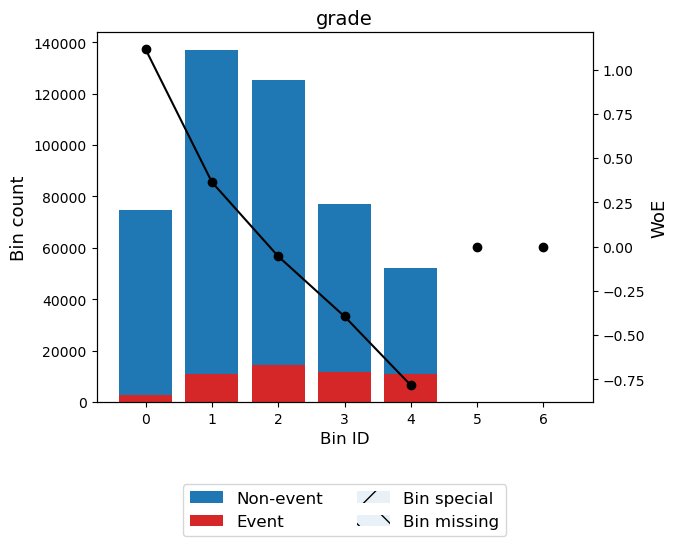

months_since_last_credit_pull


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2015.50)",327699,0.702787,301691,26008,0.079366,0.353155,0.076328,0.009492
1,"[2015.50, 2019.50)",38384,0.082319,34085,4299,0.112000,-0.027369,0.000062,0.000008
2,"[2019.50, 2024.50)",31190,0.066890,26245,4945,0.158544,-0.428746,0.014504,0.001799
3,"[2024.50, 2033.50)",34208,0.073363,26650,7558,0.220942,-0.837662,0.070465,0.008559
4,"[2033.50, inf)",34762,0.074551,26610,8152,0.234509,-0.91482,0.087706,0.010596
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,42,0.000090,36,6,0.142857,-0.306085,0.000010,0.000001
Totals,,466285,1.000000,415317,50968,0.109307,,0.249074,0.030455


<Figure size 800x800 with 0 Axes>

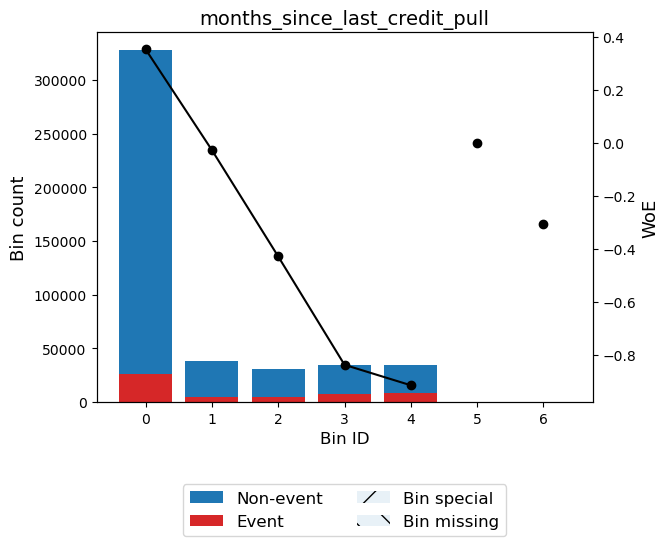

tot_cur_bal


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 54189.50)",165764,0.355499,146771,18993,0.114579,-0.053041,0.001021,0.000128
1,"[54189.50, 76203.00)",27294,0.058535,24228,3066,0.112332,-0.030709,0.000056,0.000007
2,"[76203.00, 104717.50)",23460,0.050313,20995,2465,0.105072,0.044248,0.000097,0.000012
3,"[104717.50, 154157.50)",38070,0.081645,34146,3924,0.103073,0.06569,0.000343,0.000043
4,"[154157.50, 200467.00)",36466,0.078205,32946,3520,0.096528,0.138565,0.001422,0.000178
5,"[200467.00, 243070.00)",27282,0.058509,24841,2441,0.089473,0.222244,0.002649,0.000330
6,"[243070.00, 295684.50)",25397,0.054467,23356,2041,0.080364,0.33957,0.005498,0.000684
7,"[295684.50, 377536.50)",24556,0.052663,22702,1854,0.075501,0.407263,0.007447,0.000925
8,"[377536.50, inf)",27720,0.059449,25975,1745,0.062951,0.602536,0.017055,0.002100
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


<Figure size 800x800 with 0 Axes>

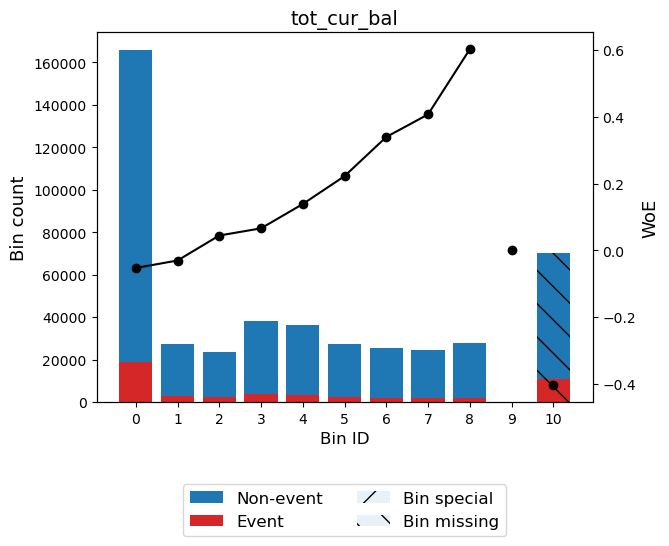

total_rev_hi_lim


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6843.50)",26920,0.057733,23604,3316,0.123180,-0.135187,0.001112,0.000139
1,"[6843.50, 12963.50)",65153,0.139728,57701,7452,0.114377,-0.051052,0.000372,0.000046
2,"[12963.50, 15518.00)",30568,0.065556,27113,3455,0.113027,-0.037653,0.000094,0.000012
3,"[15518.00, 19244.00)",40499,0.086855,35992,4507,0.111287,-0.020179,0.000036,0.000004
4,"[19244.00, 27926.00)",76525,0.164116,68497,8028,0.104907,0.04601,0.000341,0.000043
5,"[27926.00, 31796.00)",25149,0.053935,22639,2510,0.099805,0.101547,0.000535,0.000067
6,"[31796.00, 36034.50)",23565,0.050538,21224,2341,0.099342,0.10671,0.000552,0.000069
7,"[36034.50, 44201.50)",33771,0.072426,30747,3024,0.089544,0.221368,0.003254,0.000406
8,"[44201.50, 55862.00)",29525,0.063320,27025,2500,0.084674,0.282628,0.004528,0.000564
9,"[55862.00, inf)",44334,0.095079,41418,2916,0.065773,0.555659,0.023623,0.002915


<Figure size 800x800 with 0 Axes>

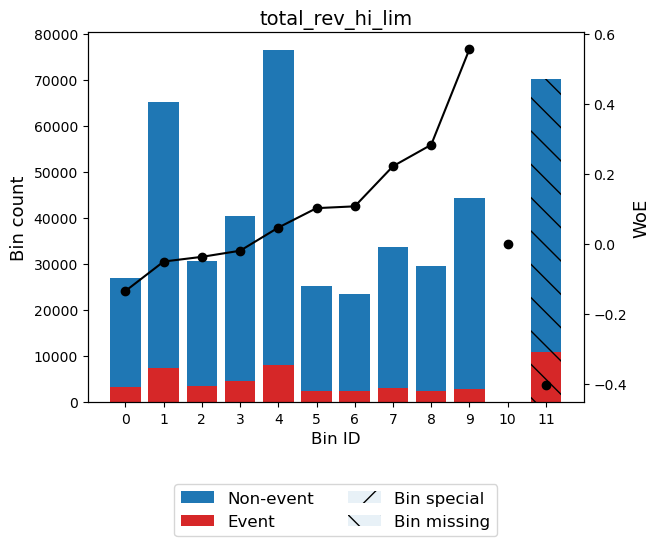

annual_inc


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 28188.50)",24767,0.053116,21012,3755,0.151613,-0.375839,0.008675,1.078004e-03
1,"[28188.50, 36481.50)",38553,0.082681,33097,5456,0.141519,-0.295117,0.008073,1.005531e-03
2,"[36481.50, 40311.00)",26063,0.055895,22577,3486,0.133753,-0.229667,0.003223,4.020386e-04
3,"[40311.00, 45751.24)",33356,0.071536,29065,4291,0.128643,-0.184829,0.002626,3.277762e-04
4,"[45751.24, 50421.50)",35680,0.076520,31345,4335,0.121497,-0.119511,0.001145,1.430426e-04
5,"[50421.50, 60996.50)",66684,0.143011,58863,7821,0.117285,-0.079444,0.000931,1.163440e-04
6,"[60996.50, 66097.50)",30184,0.064733,26906,3278,0.108601,0.007272,0.000003,4.266541e-07
7,"[66097.50, 71240.50)",25257,0.054166,22658,2599,0.102902,0.067542,0.000241,3.007702e-05
8,"[71240.50, 80046.22)",44809,0.096098,40379,4430,0.098864,0.112066,0.001155,1.443112e-04
9,"[80046.22, 90230.50)",35074,0.075220,31936,3138,0.089468,0.222304,0.003407,4.250442e-04


<Figure size 800x800 with 0 Axes>

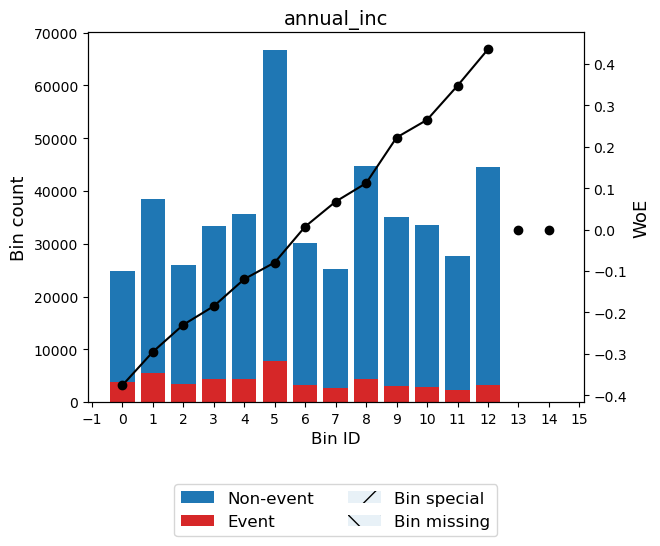

inq_last_6mths


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",241527,0.517981,219484,22043,0.091265,0.20044,0.019240,0.002401
1,"[0.50, 1.50)",130148,0.279117,115108,15040,0.115561,-0.062687,0.001124,0.000140
2,"[1.50, 2.50)",57825,0.124012,49938,7887,0.136394,-0.252278,0.008704,0.001085
3,"[2.50, inf)",36785,0.078890,30787,5998,0.163056,-0.462178,0.020129,0.002494
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,466285,1.000000,415317,50968,0.109307,,0.049197,0.006121


<Figure size 800x800 with 0 Axes>

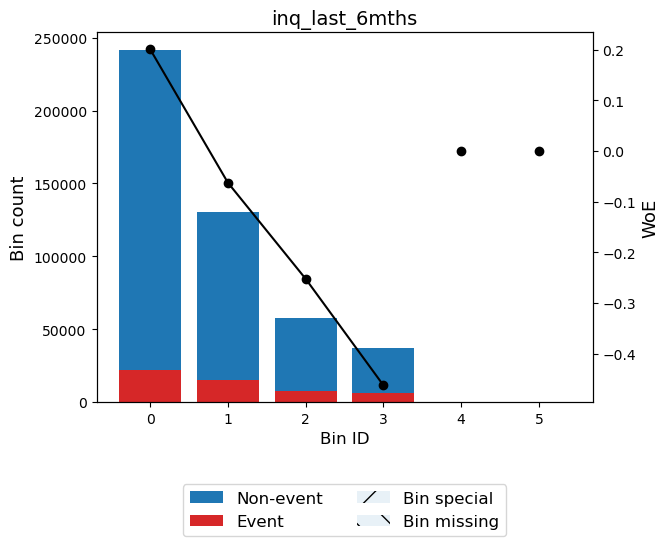

term


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.00)",337953,0.724778,305143,32810,0.097085,0.132203,0.012029,0.001502
1,"[48.00, inf)",128332,0.275222,110174,18158,0.141492,-0.294894,0.026831,0.003342
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,466285,1.000000,415317,50968,0.109307,,0.038860,0.004844


<Figure size 800x800 with 0 Axes>

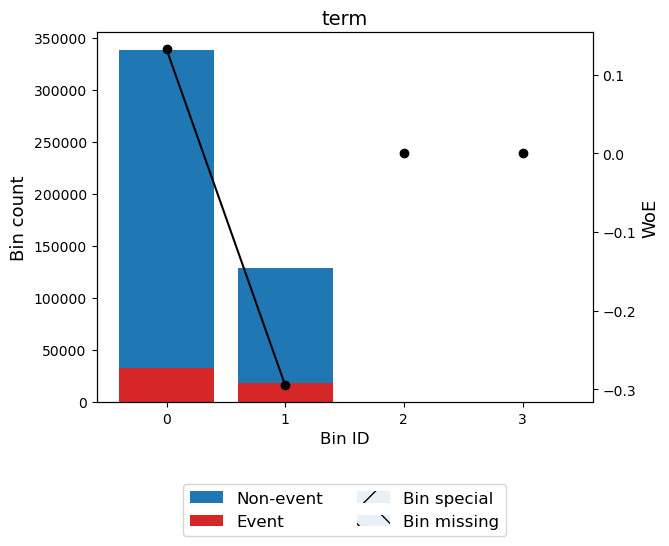

tot_coll_amt


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 114.50)",358117,0.768022,321627,36490,0.101894,0.07851,0.004591,0.000574
1,"[114.50, inf)",37892,0.081264,34333,3559,0.093925,0.168783,0.002167,0.000271
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,70276,0.150715,59357,10919,0.155373,-0.404778,0.028866,0.003584
Totals,,466285,1.000000,415317,50968,0.109307,,0.035624,0.004428


<Figure size 800x800 with 0 Axes>

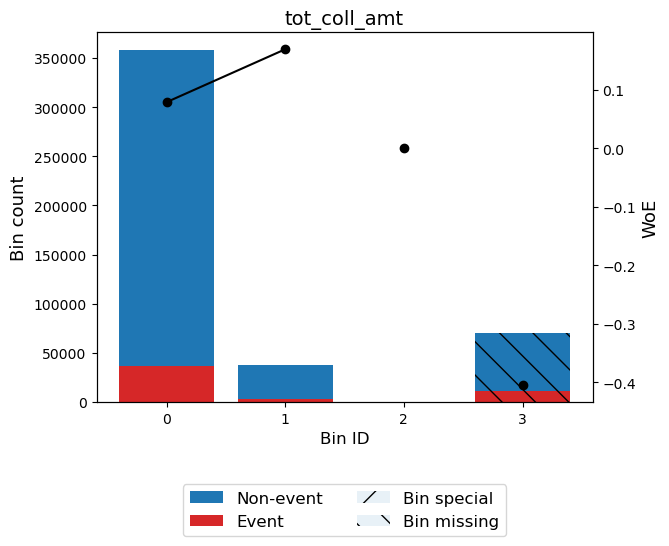

purpose


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[credit_card, car]",109554,0.234951,100092,9462,0.086368,0.260962,0.014446,0.001801
1,"[major_purchase, home_improvement]",36365,0.077989,32821,3544,0.097456,0.127968,0.001215,0.000152
2,"[debt_consolidation, vacation, wedding]",279025,0.598400,247378,31647,0.113420,-0.04157,0.001051,0.000131
3,"[medical, other, house, moving, renewable_ener...",41341,0.088660,35026,6315,0.152754,-0.384681,0.015220,0.001891
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,466285,1.000000,415317,50968,0.109307,,0.031932,0.003975


<Figure size 800x800 with 0 Axes>

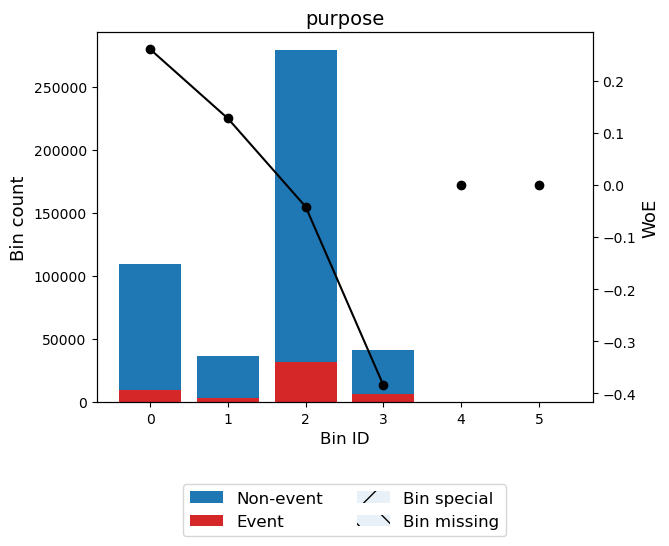

In [141]:
# WOE y gráficas.

for var in IV.head(15)['var_name']:
    if var in categorical_vars:
        var_type = 'categorical'
    else:
        var_type = 'numerical'
    optb = optbin.OptimalBinning(name=var, dtype = var_type, solver="cp")
    optb.fit(data[var].values, data.default)
    binning_table = optb.binning_table
    print(var)
    display(binning_table.build())
    fig = plt.figure(figsize=(8,8))
    binning_table.plot('woe')
    plt.show()


## Modelización 

Después de hacer un análisis de las variables entender cuales son las que tienen mayor poder predictivo, sus relaciones con la variable dependiente, sus distribuciones y como funcionan procedemos a realizar el proceso de modelización. Separamos los data sets de train y test y obtenemos 326399 observaciones para entrenar el modelo mientras que para probarlo serán 139866. 

In [76]:
# Variables dependientes
var_x = list(set(data.columns).difference(set(['default'])))
print(var_x)

['int_rate', 'collection_recovery_fee', 'out_prncp', 'open_acc', 'grade', 'revol_util', 'total_rec_late_fee', 'total_acc', 'inq_last_6mths', 'months_since_issue_date', 'total_pymnt', 'home_ownership', 'addr_state', 'verification_status', 'recoveries', 'installment', 'tot_coll_amt', 'loan_amnt', 'purpose', 'annual_inc', 'revol_bal', 'months_since_last_credit_pull', 'initial_list_status', 'delinq_2yrs', 'total_rec_prncp', 'dti', 'pub_rec', 'total_rec_int', 'months_since_earliest_cr_line', 'mths_since_last_delinq', 'last_pymnt_amnt', 'total_rev_hi_lim', 'tot_cur_bal', 'emp_length', 'acc_now_delinq', 'term']


In [77]:
# Separación X e Y
X = data[var_x]
y = data['default']
# Separación en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)

# Confirmación de dimensiones
print('X train:',X_train.shape)
print('X test:',X_test.shape)
print('y train:',y_train.shape)
print('y test:',y_test.shape)

X train: (326399, 36)
X test: (139886, 36)
y train: (326399,)
y test: (139886,)


## Pipeline del modelo 

Para modelizar obtenemos el binning process automático el cual incluye la regresión lineal. Hemos dejado un criterio de selección de entre 0.02 a 1 para incluir variables que tienen algún poder predictivo aunque sea bajo pero que son varias. Podemos ver que el modelo selecciona 19 de las 36 variables disponibles con este criterio de selección.

In [134]:
# Criterio de selección en optbinnning
sel_crt = {
    "iv": {"min": 0.02, "max": 1}
}

# Proceso de categorización
binpro = optbin.BinningProcess(var_x, selection_criteria=sel_crt,)

# Regresión logística
logreg = LogisticRegression() 

# Scorecard
scorecard = optbin.Scorecard(binning_process=binpro,
                             estimator=logreg, 
                             scaling_method="min_max", scaling_method_params={"min": 300, "max": 1000},)

# Estimación
scorecard_fit = scorecard.fit(X_train, y_train, show_digits=4,)
# Información general de la estimación (nivel 1)
scorecard.information(print_level=1)

optbinning (Version 0.17.2)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Statistics
    Number of records                 326399
    Number of variables                   36
    Target type                       binary

    Number of numerical                   29
    Number of categorical                  7
    Number of selected                    19

  Timing
    Total time                          7.84 sec
    Binning process                     6.54 sec   ( 83.46%)
    Estimator                           1.26 sec   ( 16.04%)
    Build scorecard                     0.04 sec   (  0.46%)
      rounding                          0.00 sec   (  0.00%)



## Evaluación del modelo

Siguiendo estos criterios obtenemos buenos resultados en las predicciones. El modelo reporta un AUC 0.89 tanto en train como en test lo que nos dice que tiene una capacidad muy buena pra discriminar entre buenos y malos prestatarios. El coeficiente de Gini también tiene resultados bastante importantes ya que obtenemos un valor de 0.79. Estos son resultados bastante positivos. Por otro lado la curva KS nos da una diferencia entre las distribuciones de 67% con un punto de corte de 0.18.



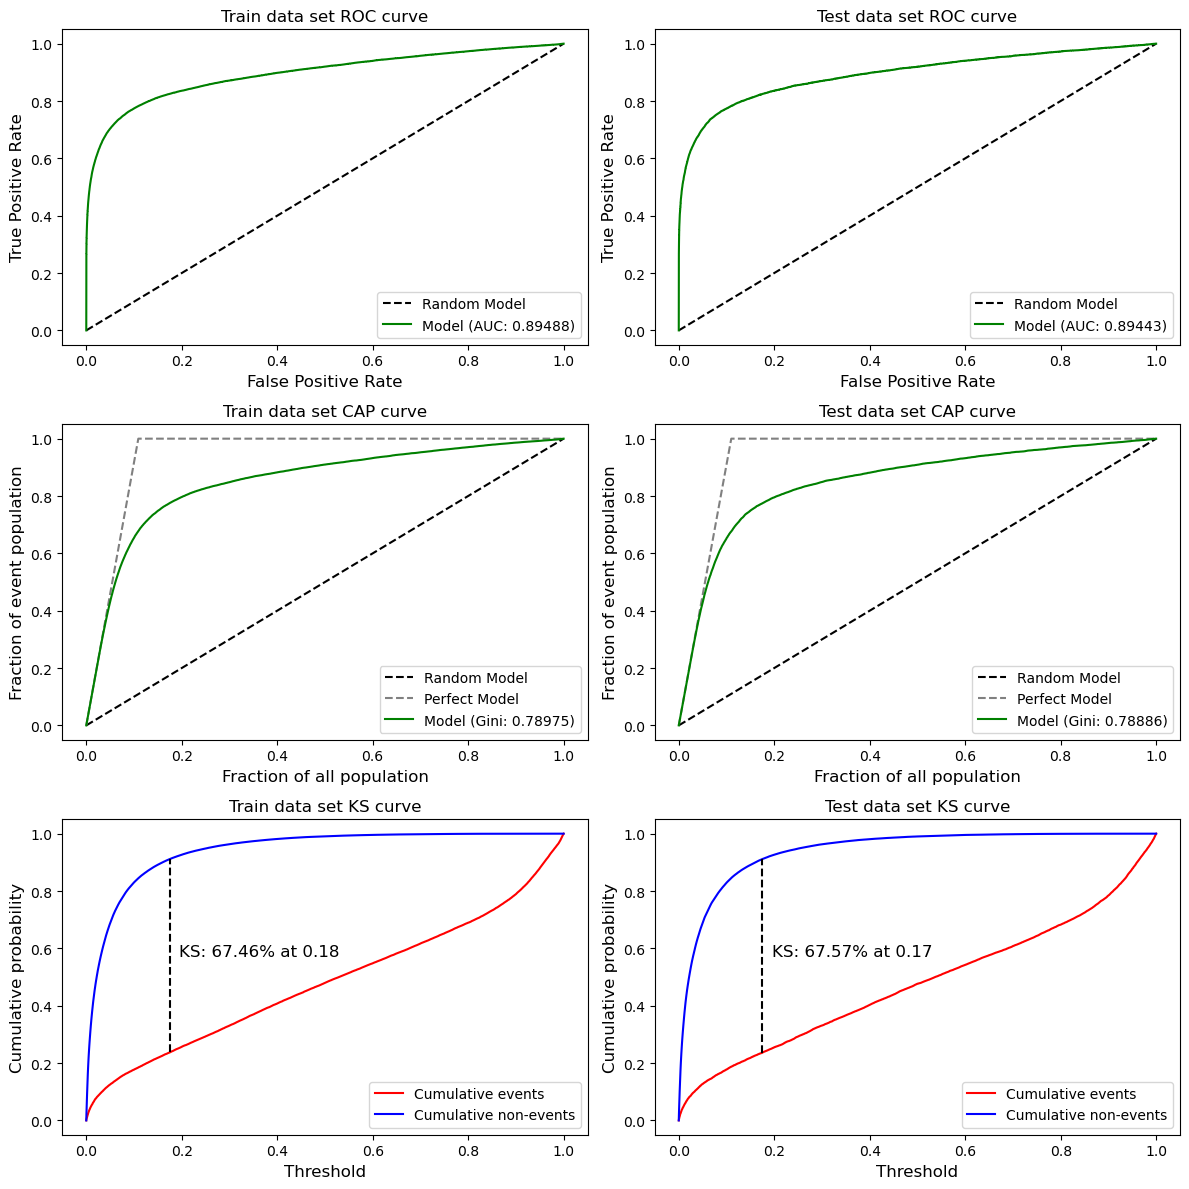

ROC AUC in trainning: 0.8948752373995338
ROC AUC in test: 0.8944295813010052


In [138]:
# Predicción sobre train
y_prob_train = scorecard.predict_proba(X_train)[:, 1]
# Predicción sobre test
y_prob_test = scorecard.predict_proba(X_test)[:, 1]

# Plots de Análisis de predicciones 

fig= plt.figure(figsize=(12,12))

title_functions = {'ROC': optbin.scorecard.plot_auc_roc, 'CAP': optbin.scorecard.plot_cap, 'KS': optbin.scorecard.plot_ks}

data_sets = {'Train': (y_train, y_prob_train), 'Test': (y_test, y_prob_test)}

for i, (title, func) in enumerate(title_functions.items()):
    for j, (name, (y, y_prob)) in enumerate(data_sets.items()):
        ax = plt.subplot(3, 2, 2*i + j + 1)
        func(y, y_prob)
        plt.title(f'{name} data set {title} curve')

plt.subplots_adjust(hspace=0.4, wspace=0.2)

plt.tight_layout()

plt.show()
print('ROC AUC in trainning:' ,metrics.roc_auc_score(y_train, y_prob_train))
print('ROC AUC in test:' ,metrics.roc_auc_score(y_test, y_prob_test))


## Densidad de los score

Al calcular los score de crédito y analizar sus distribuciones vemos que tanto la distribución de los buenos y malos pagadores se asemejan a una normal, y de manera visual se separan de forma adecuada pudiendo observar que la media de los buenos pagadores tiene un score mucho mayor que la media de los malos pagadores. Para los buenos pagadores el score de crédito medio está entre 600 y 700 puntos. Mientras que la media de un mal pagador no es mucho mayor que 500 puntos.Ambas distribuciones se seperan de forma clara.

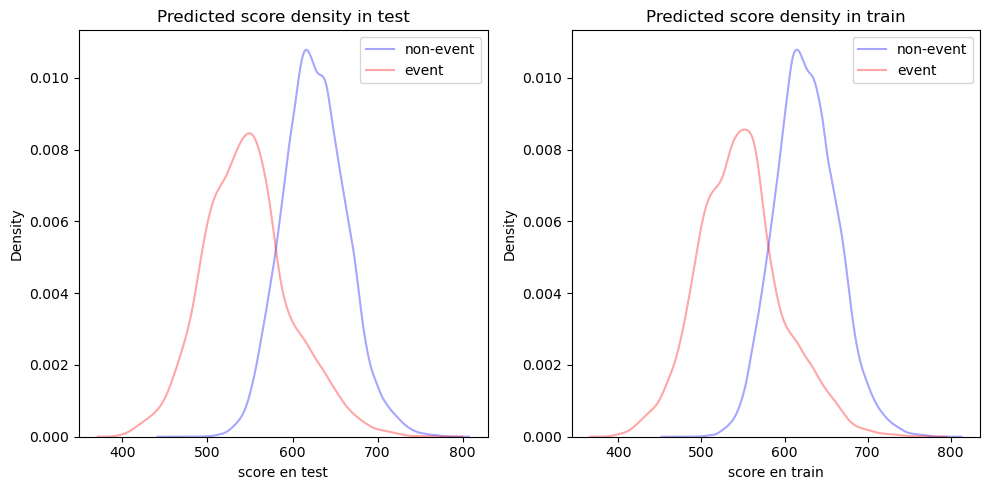

In [136]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
# Predicted score density
score_test = scorecard.score(X_test)
mask = y_test == 0
sns.kdeplot(score_test[mask], label="non-event", color="b", alpha=0.35)
sns.kdeplot(score_test[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en test")
plt.title('Predicted score density in test')
plt.legend()


plt.subplot(1, 2, 2)
# Predicted score density
score_train = scorecard.score(X_train)
mask = y_train == 0
sns.kdeplot(score_train[mask], label="non-event", color="b", alpha=0.35)
sns.kdeplot(score_train[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en train")
plt.title('Predicted score density in train')
plt.legend()

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.tight_layout()

plt.show()



## Precision - Recall

La buena discriminación entre buenos y malos pagadores del modelo nos permite elegir un punto de corte en donde tendremos valores de precisión y recall muy buenos. He elegido un punto de corte de 0.24 y lo he comparado con un punto de corte de 0.1.
En el caso de este reporte de clasificación, la precisión de la clase 1 es 0.61, lo que significa que el 61% de los casos que el modelo predijo ser clase 1 son realmente clase 1. El recall de la clase 1 es 0.72, lo que significa que el 72% de los casos que son realmente clase 1 son correctamente identificados por el modelo. El f1-score de la clase 1 es 0.66, lo que es un equilibrio entre precisión y recall.

La precisión del modelo es 0.92, lo que significa que el 92% de todas las predicciones realizadas por el modelo son correctas.

Con un corte de 0.1 vemos que el modelo tiene mejor recall lo que quiere decir que logramos predecir un 83% de los casos pero estamos sacrificando posibles buenos pagadores pues la precisión es solamente de 0.37. Para este caso podemos obtener con un punto de corte mayor un equilibrio aceptable entre precisión y recall. Con el punto de corte de 0.24 aún logramos predecir el 72% de los malos pagadores y a su vez tenemos una precisión alta de 0.61. Por otro lado, con el0.24 de corte maximizamos el accuracy y F1 score que es de 0.66 frente a un F1 score de 0.51 con el corte de 0.1.


In [139]:
# Tablas resumen de los modelos.
print('Reporte de clasificación en Train con corte en 0.24')
print(classification_report(y_train, np.where(y_prob_train>=0.24, 1, 0)))
print('Reporte de clasificación en Test con corte en 0.24')
print(classification_report(y_test, np.where(y_prob_test>0.24, 1, 0)))

Reporte de clasificación en Train con corte en 0.24
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    290813
           1       0.61      0.71      0.66     35586

    accuracy                           0.92    326399
   macro avg       0.79      0.83      0.81    326399
weighted avg       0.93      0.92      0.92    326399

Reporte de clasificación en Test con corte en 0.24
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    124504
           1       0.61      0.72      0.66     15382

    accuracy                           0.92    139886
   macro avg       0.79      0.83      0.81    139886
weighted avg       0.93      0.92      0.92    139886



In [140]:
# Tablas resumen de los modelos.
print('Reporte de clasificación en Train con corte en 0.1')
print(classification_report(y_train, np.where(y_prob_train>=0.1, 1, 0)))
print('Reporte de clasificación en Test con corte en 0.1')
print(classification_report(y_test, np.where(y_prob_test>0.1, 1, 0)))

Reporte de clasificación en Train con corte en 0.1
              precision    recall  f1-score   support

           0       0.97      0.83      0.90    290813
           1       0.37      0.82      0.51     35586

    accuracy                           0.83    326399
   macro avg       0.67      0.83      0.70    326399
weighted avg       0.91      0.83      0.85    326399

Reporte de clasificación en Test con corte en 0.1
              precision    recall  f1-score   support

           0       0.97      0.83      0.90    124504
           1       0.37      0.82      0.51     15382

    accuracy                           0.83    139886
   macro avg       0.67      0.83      0.70    139886
weighted avg       0.91      0.83      0.85    139886



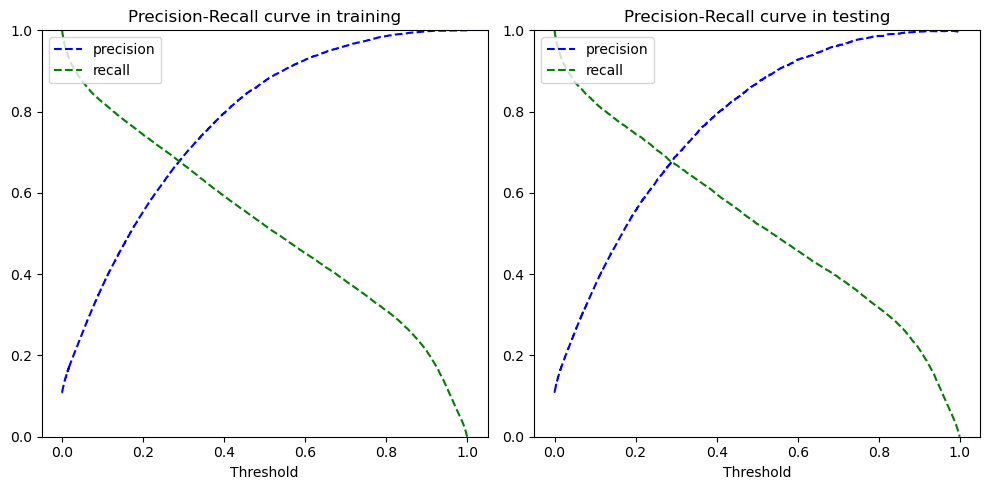

In [137]:
# Dibujar precision y recall

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)


# Precision recall curve en train
prec, rec, thre = metrics.precision_recall_curve(y_train, y_prob_train)
plt.plot(thre, prec[:-1], 'b--', label='precision')
plt.plot(thre, rec[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.title('Precision-Recall curve in training')


# Precision recall curve en train
plt.subplot(1, 2, 2)
prec, rec, thre = metrics.precision_recall_curve(y_test, y_prob_test)
plt.plot(thre, prec[:-1], 'b--', label='precision')
plt.plot(thre, rec[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.title('Precision-Recall curve in testing')

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.tight_layout()

plt.show()

